In [40]:
import meanz_modules as mzmod
import rubin_sim
import rubin_sim.maf as maf
from rubin_sim.scheduler.utils import SkyAreaGenerator
from rubin_sim.data import get_baseline

from os import path

opsim_fname = rubin_sim.data.get_baseline()
run_name = path.splitext(path.basename(opsim_fname))[0]
nside=64


In [41]:
# # Apply the above routine to our baseline sim, and show the plots
use_filter='i'
bgroup, bd = mzmod.metric_plots(run_name, opsim_fname, year=2,nside=nside, use_filter=use_filter)
bgroup.plot_all(closefigs=True)
print(list(bd.keys()))
print(bd[list(bd.keys())[0]].summary_values['Mean'])


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
['baseline_v2_1_10yrs_ExgalM5_i_and_note_not_like_DD_and_night_lt_730_and_note_not_like_twilight_near_sun_HEAL']
25.381523996118815


In [42]:
# Now testing for the g-band
use_filter='g'
bgroup, bd = mzmod.metric_plots(run_name, opsim_fname, year=2,nside=nside, use_filter=use_filter)
bgroup.plot_all(closefigs=True)
print(list(bd.keys()))
print(bd[list(bd.keys())[0]].summary_values['Mean'])

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
['baseline_v2_1_10yrs_ExgalM5_g_and_note_not_like_DD_and_night_lt_730_and_note_not_like_twilight_near_sun_HEAL']
25.727343126895526


In [43]:
# ilim = [24.1, 25.3]
# meanz = [0.92, 1.08]

# a,b = mzmod.coeff_solve(ilim,meanz)
# print(a,b)

### Computing quantities for some baseline strategies

In [59]:
import meanz_modules as mzmod
import numpy as np
import pandas as pd
import importlib
importlib.reload(mzmod)
import warnings
warnings.filterwarnings("ignore")


v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
               '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
               '/pscratch/sd/b/beckermr/v3.4_sims_rubin/roll_uniform_mjdp0_v3.4_10yrs.db',
               '/pscratch/sd/b/beckermr/v3.4_sims_rubin/baseline_v3.4_10yrs.db']
v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]
nums =len(v33_name_list)

v33_df = mzmod.get_year_by_year_metrics(np.arange(10), v33_name_list[:nums], v33_sim_list[:nums])
display(v33_df)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

baseline_v3.3_10yrs
baseline_v3.4_10yrs
noroll_v3.3_10yrs
roll_uniform_mjdp0_v3.4_10yrs


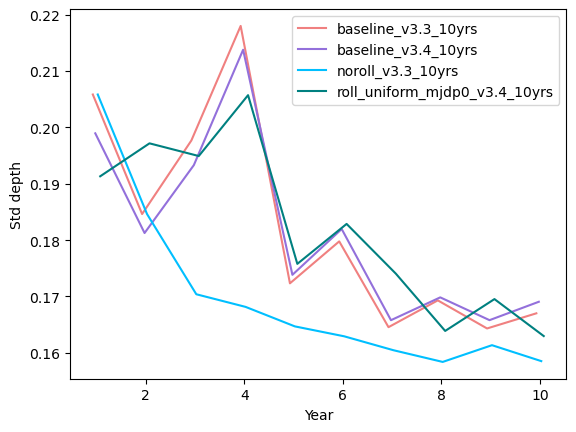

In [46]:
importlib.reload(mzmod)
import matplotlib.pyplot as plt
mzmod.plot_metric_by_year(v33_df, stat_name='Std depth',filter='i',ylog=False)


baseline_v3.3_10yrs
baseline_v3.4_10yrs
noroll_v3.3_10yrs
roll_uniform_mjdp0_v3.4_10yrs


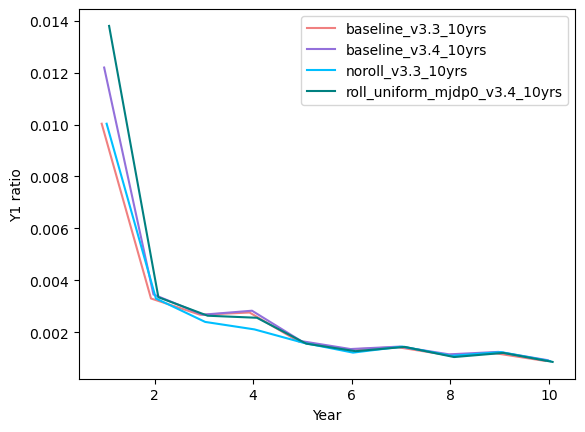

In [57]:
importlib.reload(mzmod)
mzmod.plot_metric_by_year(v33_df, stat_name='Y1 ratio',filter='combined',ylog=False)

baseline_v3.3_10yrs
baseline_v3.4_10yrs
noroll_v3.3_10yrs
roll_uniform_mjdp0_v3.4_10yrs


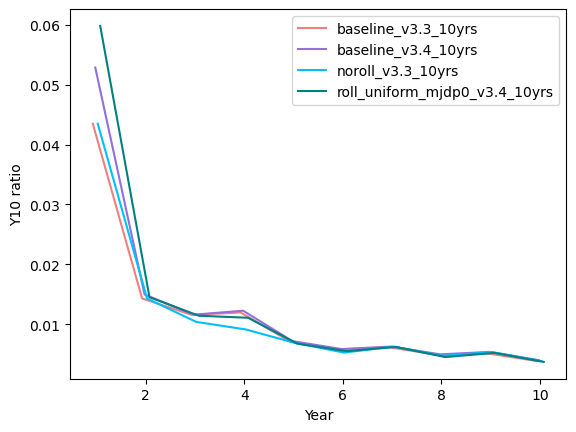

In [58]:
mzmod.plot_metric_by_year(v33_df, stat_name='Y10 ratio',filter='combined',ylog=False)

(3, 2)


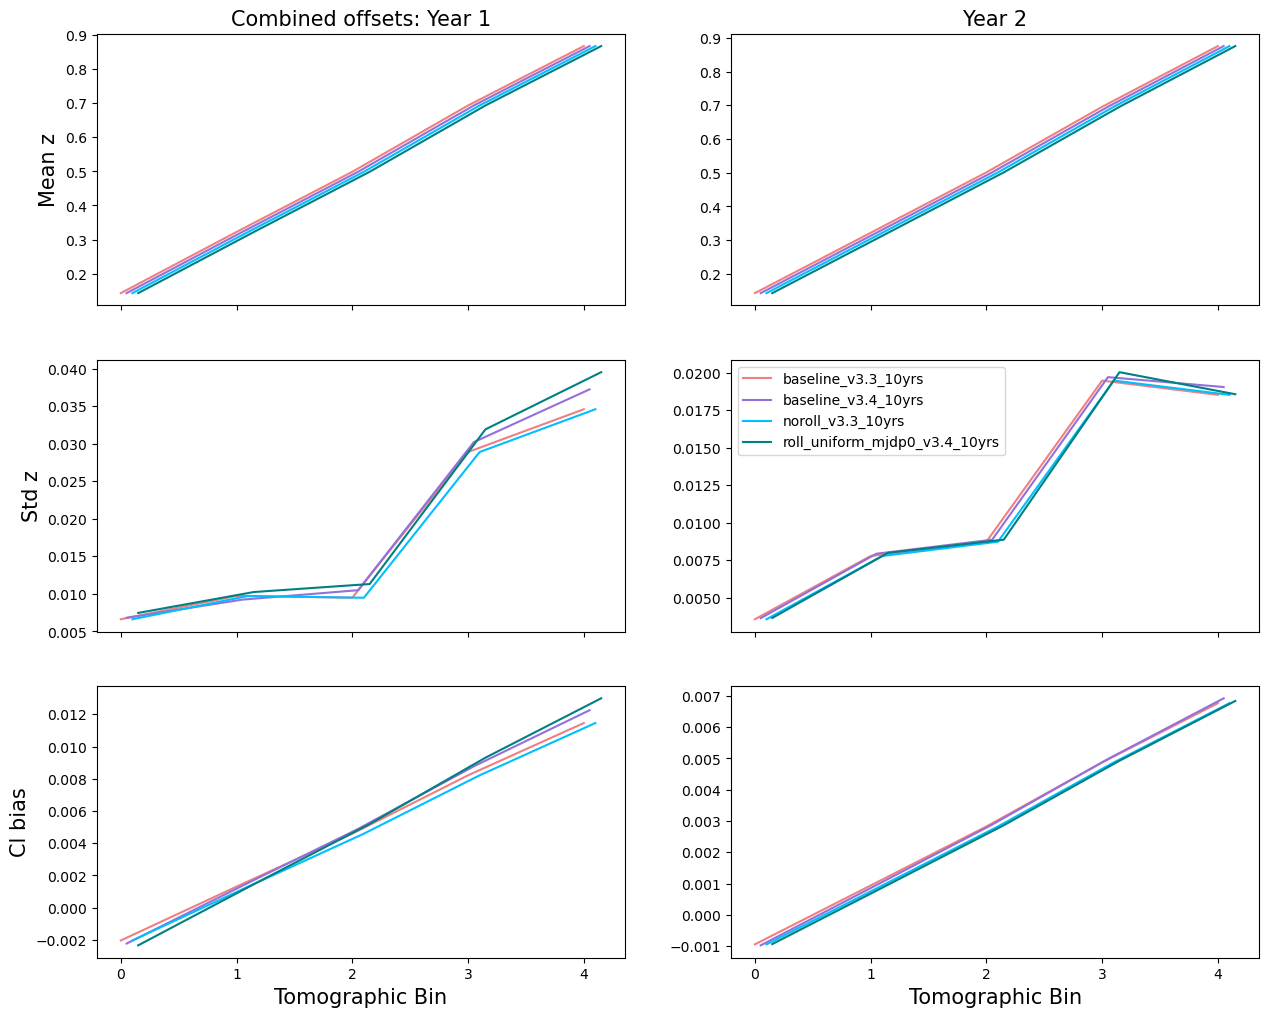

In [49]:
importlib.reload(mzmod)
years = [0,1]
mzmod.plot_meanz_metrics_by_year(v33_df,years=years,filter='combined')

In [50]:
# #Possible ones to consider

# v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season6v3.3_10yrs.db',
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season2v3.3_10yrs.db',
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season4v3.3_10yrs.db',
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season6v3.3_10yrs.db',]
# v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]
# print(v33_name_list)